# **Project Name**    - AirBnb Bookings Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Contributor**    - Meghna Phanse


# **Project Summary**

In this project, we'll be working with the AirBnb Bookings dataset where we'll first start with getting to know what Airbnb is. AirBnb is an online platform where users can find homes or rooms to rent for a day or week. Hosts list their property on Airbnb, the prices, availability and other data that is necessary to inform the users before they decide to rent that particular property. Basically, they provide a platform and a network of people that include hosts and users worldwide for best travel experiences or finding places to rent. 

Now for knowing the dataset, we'll be starting with getting to know the data and describe it, check for variables and their correlations and how they're related to each other. We'll work with the null values, the values that are odd which are statistically termed as 'Outliers'. Also, finding out the most popular places, their prices and what the users prefer most when booking on Airbnb. 

We'll also be visualising all our findings and give it a visual representation for more clarity in the information. 

# **GitHub Link -**

https://github.com/Archonuid/Data-Analysis/blob/main/AirBnb_Bookings_Analysis%20(2).ipynb

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from datetime import datetime
from datetime import date

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
filepath = '/content/drive/MyDrive/Colab Notebooks/Projects/Capstone 1/Airbnb NYC 2019.csv'
df = pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
df.columns.value_counts()

id                                1
name                              1
host_id                           1
host_name                         1
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             1
minimum_nights                    1
number_of_reviews                 1
last_review                       1
reviews_per_month                 1
calculated_host_listings_count    1
availability_365                  1
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
# Filling the missing values
df.fillna(0, inplace = True)

### What did you know about your dataset?

Our dataset has 48895 data and 16 columns. Understanding about the columns we've got here.
* id : a unique id identifying an airbnb lisitng
* name : name representating the accomodation
* host_id : a unique id identifying an airbnb host
* host_name : name under whom host is registered
* neighbourhood_group : a group of area
* beighbourhood : area falls under neighbourhood_group
* latitude : coordinate of listing
* longitude : coordinate of listing
* room_type : type to categorize listing rooms
* price : price of listing
* minimum_nights : the minimum nights required to stay in a single visit
* number_of_reviews : total count of reviews given by visitors
* last_review : date of last review given
* reviews_per_month : rate of reviews given per month
* calculated_host_listings_count : total no of listing registered under the host
* availability_365 : the number of days for which a host is available in a year.

Latitude and longitude has represented a co-ordinate, neighbourhood_group, neighbourhood and room_type are categorical type columns. Last_review is a column of date type, we can convert it as required.

There are 4 columns containing null values which are name, host_name and last_reviews, reviews_per_month (if a listing has never received a review, its possible and valid). So we just <code>fillna(0)</code> to those null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe

<bound method NDFrame.describe of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

     

### Check Unique Values for each variable.

In [ ]:
df[df['host_name']=='Susan'] # experimenting

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
533,195123,"Cheerful, comfortable room",940724,Susan,Manhattan,Washington Heights,40.83403,-73.94553,Private room,50,1,225,2019-06-12,2.35,1,343
566,212109,2-bedroom share in heart of Greenwich Village!,666271,Susan,Manhattan,West Village,40.73854,-74.00821,Private room,80,90,9,2019-06-30,0.20,1,338
948,364785,Sunny large private room in Park Slope,1842714,Susan,Brooklyn,Park Slope,40.67962,-73.97655,Private room,80,2,30,2018-12-29,0.74,1,0
1687,765315,Bed & Bathroom in Williamsburg Loft,4034995,Susan,Brooklyn,Williamsburg,40.71203,-73.95993,Private room,115,2,91,2017-04-30,1.18,1,258
2281,1095106,Greenpoint - with your own space!,6016424,Susan,Brooklyn,Greenpoint,40.73026,-73.95596,Private room,72,4,54,2019-06-02,0.72,1,71
3223,1925224,"Beautiful, large, charming spot",9946315,Susan,Brooklyn,Williamsburg,40.71758,-73.95430,Entire home/apt,250,8,79,2019-07-01,1.16,1,78
3229,1929186,Modern Bright Loft in Clinton Hill,9990552,Susan,Brooklyn,Bedford-Stuyvesant,40.69135,-73.95859,Entire home/apt,175,2,52,2019-07-04,1.26,1,264
3390,2030736,Room B,10384906,Susan,Brooklyn,Sunset Park,40.64532,-74.02063,Private room,32,1,111,2019-04-20,1.70,5,208
3395,2036105,Private room D,10384906,Susan,Brooklyn,Dyker Heights,40.62830,-74.01608,Private room,30,1,67,2019-01-22,0.99,5,150
3558,2124910,Private Room E,10384906,Susan,Brooklyn,Borough Park,40.63592,-74.00476,Private room,33,1,98,2019-06-16,1.55,5,0


In [ ]:
df[df['name'] == df['host_name']] #checking for correlations

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9473,7264659,Olivier,6994503,Olivier,Manhattan,Upper West Side,40.78931,-73.97520,Entire home/apt,200,5,12,2018-01-30,0.25,1,25
10682,8212051,Monty,43302952,Monty,Brooklyn,East Flatbush,40.66383,-73.92706,Shared room,95,2,7,2015-10-30,0.15,1,238
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,0.00,1,0
23996,19348168,Cyn,74033595,Cyn,Brooklyn,Bedford-Stuyvesant,40.67850,-73.91478,Private room,75,2,1,2018-09-10,0.10,1,0
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,0,0.00,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,0,0.00,18,365


In [ ]:
df.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['name'] == 'Sean')] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
16422,13186374,Sean,35143476,Sean,Brooklyn,Windsor Terrace,40.65182,-73.98043,Entire home/apt,400,7,0,0,0.0,1,0


**Variables**

A property name will have one host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

While Id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365 are numerical variables.

Furthermore, A host can have multiple properties in a neighbourhood group with different host-ids but a host with a particular property/listing in a particular neighbourhood of a neighbourhood group have a same host-id (in some cases some hosts gave different ids for each listing/property in neighborhood)

There is also a possibility that someone has listed someone else's property with their id but such cases are hard to detect and for now we'll ignore it.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [ ]:
len(df[df['price'] == 0])

11

There are 11 listings that are listed for free. 

In [ ]:
df['host_name'].value_counts()[:3] #Michael has the most number of listings here.

Michael         417
David           403
Sonder (NYC)    327
Name: host_name, dtype: int64

In [ ]:
df['price'].max()

10000

In [ ]:
df['price'].idxmax() #gives the index number of max value in the price column

9151

In [ ]:
df.iloc[9151] #info about this listing, host and neighbourhood

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
latitude                                                      40.7681
longitude                                                   -73.91651
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_list

In [ ]:
df['neighbourhood_group'].value_counts() # counting values of all the neighbourhood_groups

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df['minimum_nights'].max()

1250

In [ ]:
df['reviews_per_month'].idxmax()

42075

In [ ]:
df.iloc[42075]

id                                                                         32678719
name                              Enjoy great views of the City in our Deluxe Room!
host_id                                                                   244361589
host_name                                                                   Row NYC
neighbourhood_group                                                       Manhattan
neighbourhood                                                      Theater District
latitude                                                                   40.75918
longitude                                                                 -73.98801
room_type                                                              Private room
price                                                                           100
minimum_nights                                                                    1
number_of_reviews                                                           

In [ ]:
len(df[df['availability_365'] == 0])

17533

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
(df[df['last_review']==0])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,0,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,0,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,0,0.0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,0.0,6,2


### What all manipulations have you done and insights you found?

Through the manipulations and trying out a few things, we get to know that there exist listings which are listed for 0 price, the most number of listings are in Manhattan while the most number of listings that a host has is Michael with 417 listings in multiple places. The maximum price in this dataset is 10000 whose host is katherine, listed in Queens, Astoria. 

Manhattan being the most preferred neighbourhood by hosts. The maximum number of nights a guest can stay at a place according to this dataset is 3.4 years while there are listings where the number is 0 making it unavailable. 

The maximum number of reviews a host has is 58.5 in manhattan. There are 17533 listings in this dataset where the minimum number of nights is 0 making it unavailable. Most of these listings are an entire home/apartments being followed by private rooms and considerably low number of shared rooms. This indicates that users prefer entire home/apartment and private rooms the most. 

There are also listings with 0 number of reviews indicating no guests opted for these listings before. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Distplot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


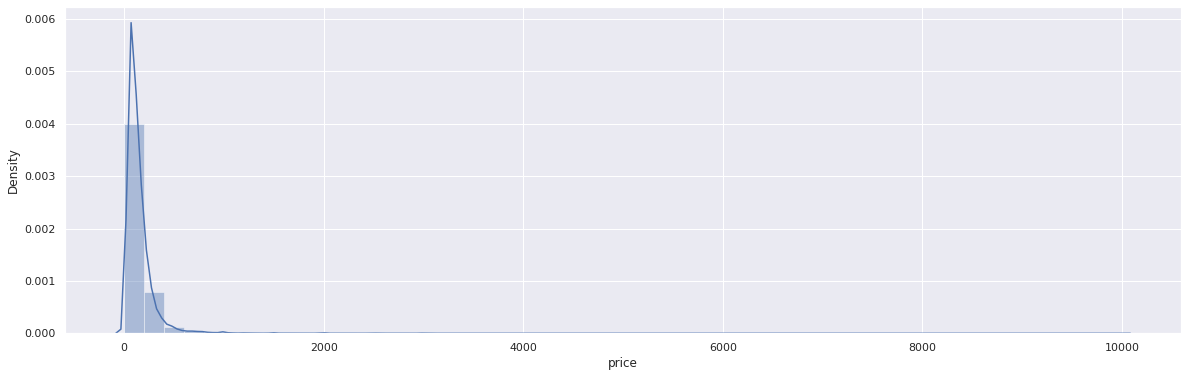

In [ ]:
#distplot
sns.set(rc={"figure.figsize": (20, 6)})
sns.distplot(df['price'],hist=True)

##### 1. Why did you pick the specific chart?

This graph shows the range of distribution and where it is has the highest density probability. It only needs one variable and it estimates the y-axis giving a visual representation of a graph made with only one variable provided. Here, price is given. 

##### 2. What is/are the insight(s) found from the chart?

This graph tells us that it has a positive skewness and it does not deviate much from normal distribution. This graph shows that the probability density is the highest around the prices between 0 to 2000. It shows that most hosts prefer setting their prices in this range.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


The skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed. The kurtosis is also very high which shows that there are outliers in the dataset. 

#### Chart - 2 : Scatter plot

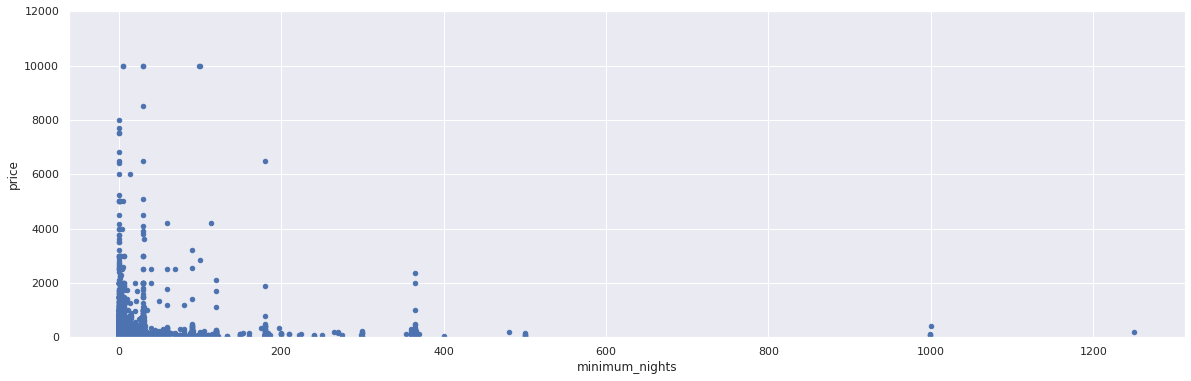

In [ ]:
# price vs minimum nights
mn = 'minimum_nights'
data = pd.concat([df['price'], df[mn]], axis = 1)
data.plot.scatter(x = mn, y = 'price', ylim = (0,12000))

##### 1. Why did you pick the specific chart?

Scatter plot is used for finding out the corelation between two variables. It can help to determine any kind of relation between your two variables. So here we try to find any corelation between minimum nights and the prices of the listed properties. 

##### 2. What is/are the insight(s) found from the chart?

The graph shows there are many outliers here too. The plots are all mostly clustered around 0 to 2000 prices with minimum nights between 0 to 200. A few of them have minimum nights more than 0 but the price seems to be 0 too which indicates anomalies in the data.  

#### Chart - 3 : Boxplot

<function matplotlib.pyplot.show(*args, **kw)>

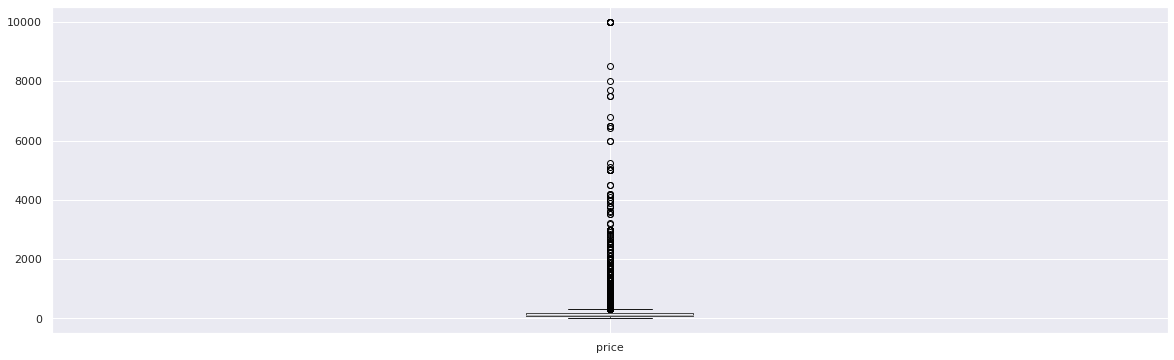

In [ ]:
# boxplot
df.boxplot(column = ['price'])
plt.show

##### 1. Why did you pick the specific chart?

Box plot will show where the median stands and help understand the amount of outliers in the dataset with points. It will show the trend of prices in different quartiles/parts. 

##### 2. What is/are the insight(s) found from the chart?

Way too many outliers. The boxes are heavily compressed near the lowest values which is close to 0. The extremely short box indicates that most owners follow the price trends keeping the prices similar to the other, hence, resulting in a compressed box with values focused near 0. 

#### Chart - 4 : Correlation Matrix

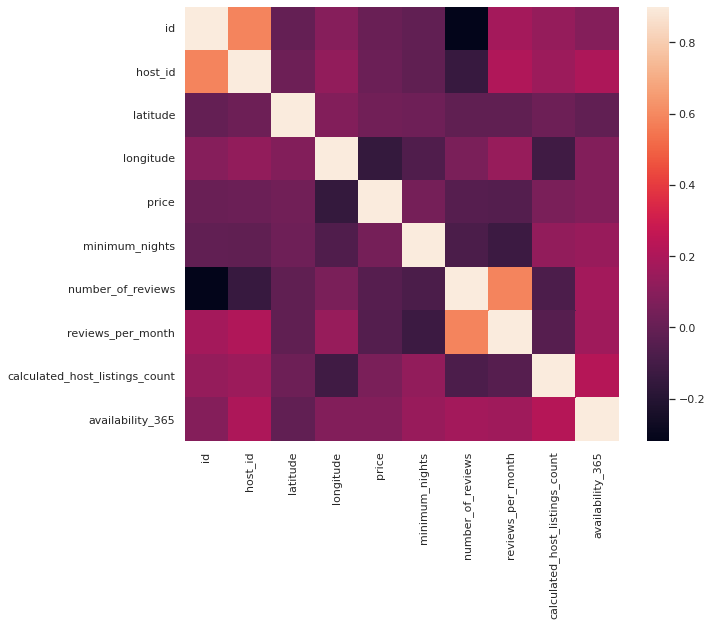

In [ ]:
# correlation matrix
cm = df.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(cm, vmax=0.9, square = True)

##### 1. Why did you pick the specific chart?

It helps understand the correlation between two entites so here we're looking at multiple correlations narrated below.

##### 2. What is/are the insight(s) found from the chart?

From the heatmap, we can see that multiple correlations exist that can affect the airbnb listings. There's correlation among host_id, reviews_per_month and availability_365. 

number_of_review and reviews_per_month are almost the same. 

minimum_nights and calculated_host_listings_count also have a correlation and they're also correlated to availability_365. Price is also related to availability_365 and calculated_host_listings_count.

**Data Re-processing**

In [ ]:
# null values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# filling the empty/invalid values in host_names and names
df['name'].fillna('unknown', inplace=True)
df['host_name'].fillna('no_name', inplace=True)

Both 'name' and 'host_name' don't have many missing values as compared to 47,905 listings and 11452 unique hosts. 

These missing values can be filled in with both unknown and no_name.

In [ ]:
df[['host_name', 'name']].isnull().values.any()

False

Therefore, no null values in host_name and name anymore. 

In [ ]:
number_of_hosts = df['host_name'].nunique()
print(f'Number of hosts: {number_of_hosts}')
number_of_listings = df['name'].nunique()
print(f'Number of Listings: {number_of_listings}')

Number of hosts: 11453
Number of Listings: 47906


In [ ]:
# last_review has many null values and it is not as required as reviews_per_month and number_of_reviews so we can drop this column
df = df.drop('last_review',axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
# duplicate data
duplicated_data = df.duplicated()
print(duplicated_data.sum())

0


So we have no duplicate data present in the dataset. 

Also, reviews_per_month has many null values which can be replaced with 0 wherever there is NaN values present.

In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype('int64')

In [ ]:
df['reviews_per_month'].isnull().values.any() # there are no NaN values present now

False

Now, for the most number of listings in NYC

In [ ]:
top5_listings = df['name'].value_counts()[:5].reset_index()
top5_listings.rename(columns = {'index': 'Listings', 'name': 'Total_listings'}, inplace = True)
top5_listings

,Listings,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,0,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


Hillside Hotel has the most number of listings followed by Home away from home

In [ ]:
top10_hosts = df['host_name'].value_counts()[:10]
top10_hosts

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

#### Chart - 5 : Bar

Text(0.5, 1.0, 'Top 10 hosts of listings in NYC')

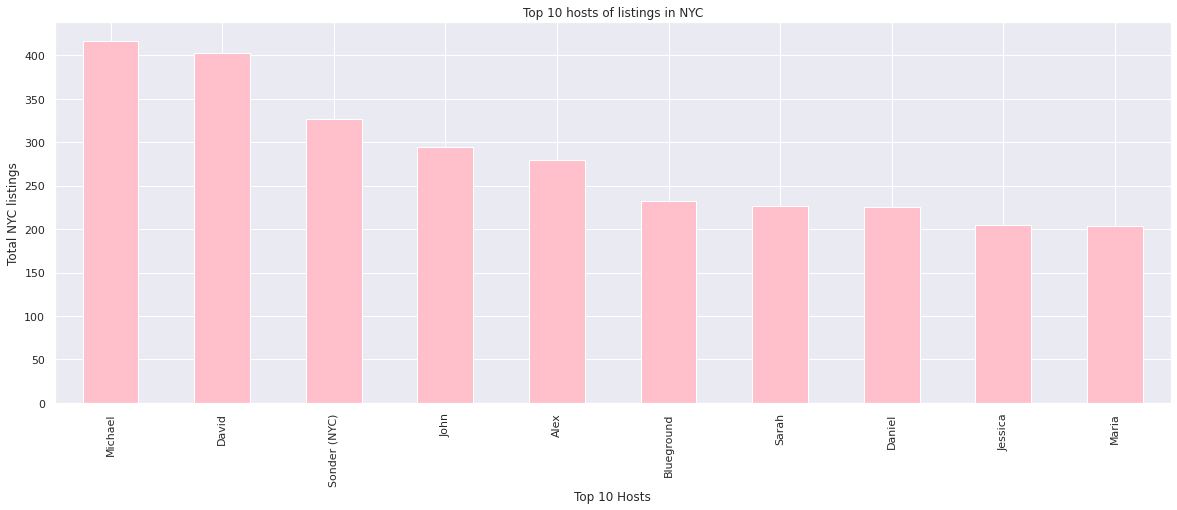

In [ ]:
# Chart - 5 visualization code
top10_hosts.plot(kind = 'bar', color = 'pink', figsize = (20, 7))
plt.xlabel('Top 10 Hosts')
plt.ylabel('Total NYC listings')
plt.title('Top 10 hosts of listings in NYC')

##### 1. Why did you pick the specific chart?

Bar graphs are very easy to read and gives the visual representation of quantity as compared to other variables in the column.

##### 2. What is/are the insight(s) found from the chart?

As per the graph, these are the top 10 hosts in NYC with maximum number of listings, Michael having the most listings followed by David and Sonder, so on. Jessica and Maria have the almost the same number of listings and so do sarah and Daniel. 

#### Chart - 6 : Bar (neighbourhood_group)

Text(0.5, 1.0, 'Number of listings in NYC of each neighborhood group')

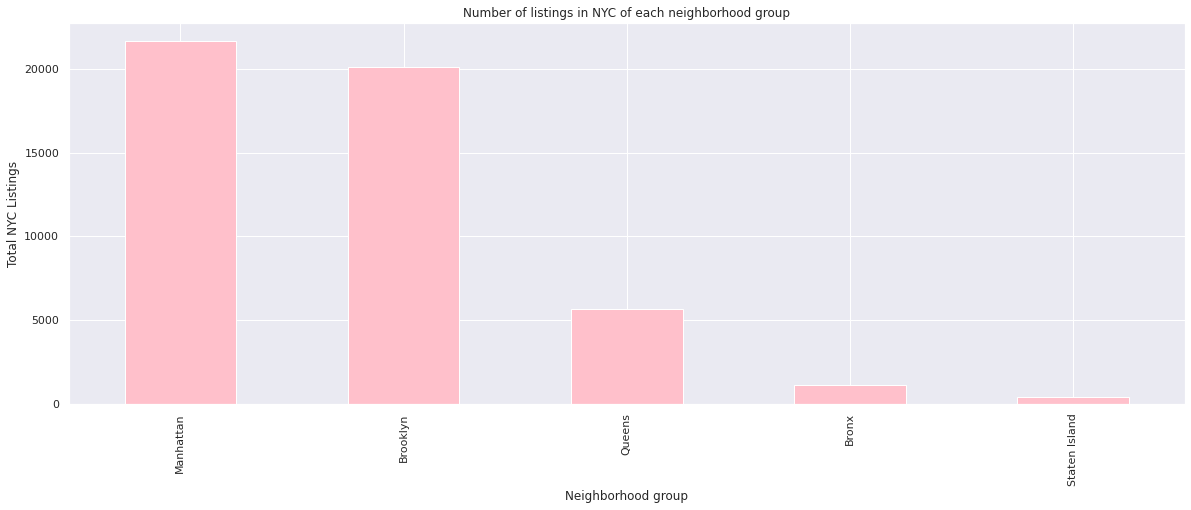

In [ ]:
# Chart - 6 visualization code
#Manhattan has the highest number of listings
df['neighbourhood_group'].value_counts().plot(kind='bar',color='pink', figsize=(20,7))
plt.xlabel('Neighborhood group')
plt.ylabel('Total NYC Listings')
plt.title('Number of listings in NYC of each neighborhood group')

##### 2. What is/are the insight(s) found from the chart?

Manhattan has a whooping amount of listings followed by Brooklyn while queens, Bronx and Staten Islands have considerably less amount of listings as compared to Manhattan and Brooklyn. 

#### Chart - 7 : Bar (neighbouthood)

In [ ]:
df['neighbourhood'].unique() #all unique neighbourhoods

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [ ]:
# top 10 neighborhoods in NYC according to listings
top10_neighbourhoods = df['neighbourhood'].value_counts()[:10]
top10_neighbourhoods

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0.5, 1.0, 'Top 10 Neighbourhoods in NYC as per listings')

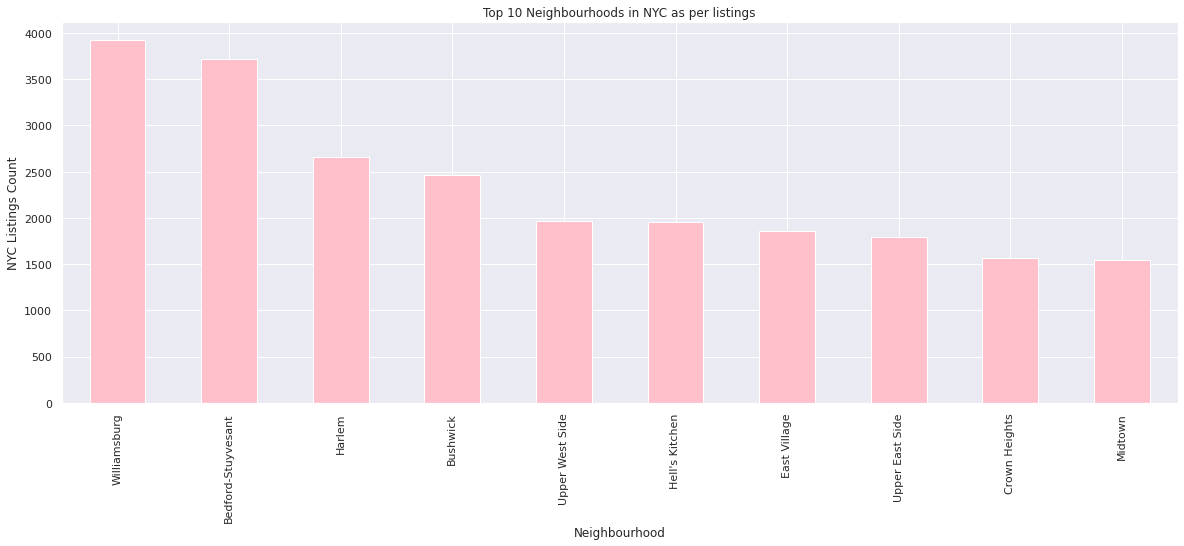

In [ ]:
# Chart - 7 visualization code
top10_neighbourhoods.plot(kind='bar', color = 'pink', figsize=(20,7))
plt.xlabel('Neighbourhood')
plt.ylabel('NYC Listings Count')
plt.title('Top 10 Neighbourhoods in NYC as per listings')

##### 2. What is/are the insight(s) found from the chart?

Williamsburg has the most count of listings in NYC followed by Bedford-Stuyvesant. 

#### Chart - 8 : Countplot

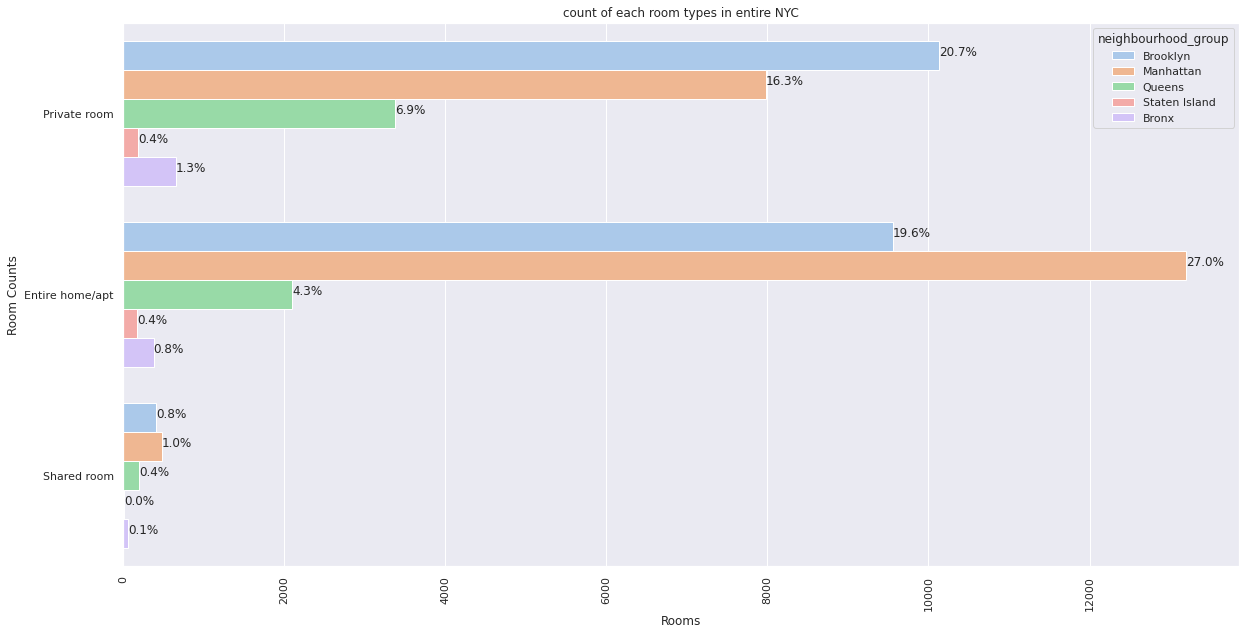

In [ ]:
# Chart - 8 visualization code
plt.rcParams['figure.figsize'] = (20,10)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df,palette='pastel')

total = len(df['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

##### 1. Why did you pick the specific chart?

It shows the comparison of different variables in the same chart for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

Brooklyn has the most number of private rooms with 20.7% followed by Manhattan at 16.3%. Manhattan has the most number of entire apartments/home at 27% followed by brooklyn at 19.6%. Manhattan having the maximum number of property listings in all groups across all types. 

There is least number of shared rooms, some places having almost none to negligible shared rooms available which are Staten Islands and Bronx. Hence, indicating rare availability of shared rooms. 

We can infer that Brooklyn, Queens, Bronx has more private room types while Manhattan which has the highest number of listings in entire NYC has more Entire home/apt room types.

#### Chart - 9 :  Distplot (Distribution of Listings according to availability)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


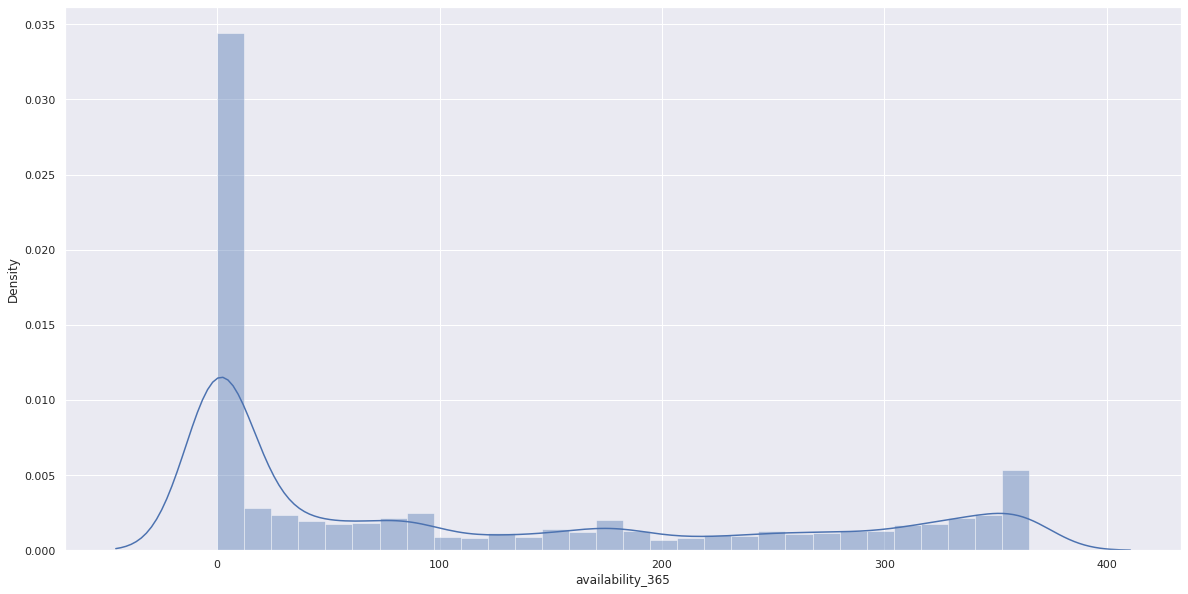

In [ ]:
# Chart - 9 visualization code
sns.distplot(df['availability_365'])

##### 2. What is/are the insight(s) found from the chart?

This distribution(availability_365) looks uniformly flat as compared to normal distribution and lacks outliers. It looks slightly skewed to the right and moderately skewed to the values ranging between (0.5 - 0.1). It also has uniform distribution ranging from 0-370.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['availability_365'].skew())
print("Kurtosis: %f" % df['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


#### Chart - 10 : Histogram (Reviews/month distribution as per listings in NYC) 

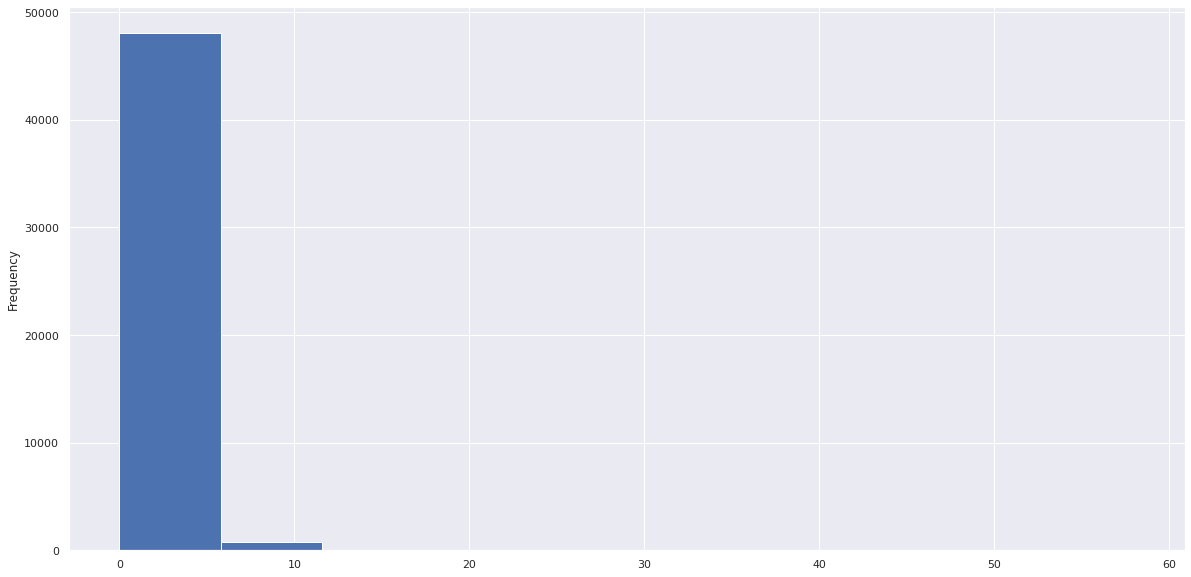

In [ ]:
# Chart - 10 visualization code
df['reviews_per_month'].plot.hist()

##### 1. Why did you pick the specific chart?

This chart illustrates features of distribution of data in a convenient form and is useful when working with large datasets.

##### 2. What is/are the insight(s) found from the chart?

It is highly clustered around 0 and 10 While the 10 being considerably less than 0. Highly infers that it has more 0 values.

#### Chart - 11 : Distplot (reviews_per_month)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


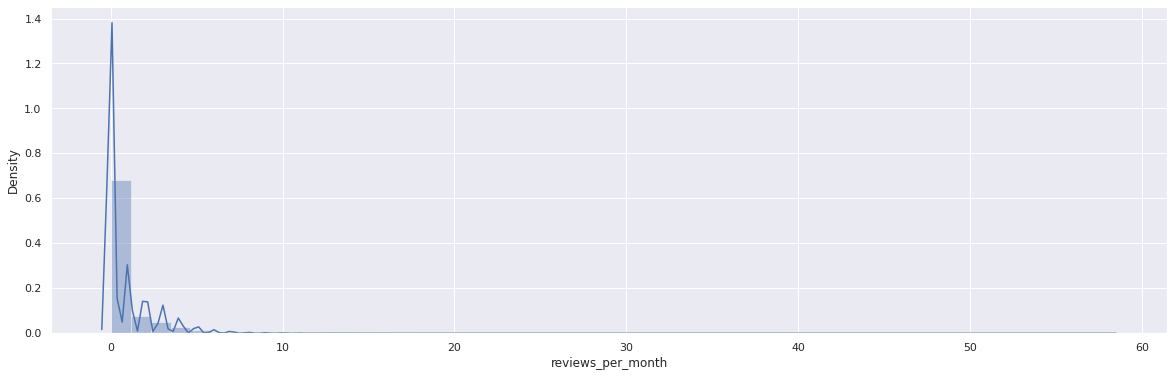

In [ ]:
# Chart - 11 visualization code
fig, ax = plt.subplots(figsize=(20,6))
sns.distplot(df['reviews_per_month'])

##### 2. What is/are the insight(s) found from the chart?

This distribution looks positively skewed on the right with long tails that show there are outliers present. Also, the monthly reviews is between 0 to 10 with the highest review in the range being 60.

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['reviews_per_month'].skew())
print("Kurtosis: %f" % df['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.751642
Kurtosis: 54.337612


#### Chart - 12 : Boxplot (price column)

**Handling the outliers (price column)**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


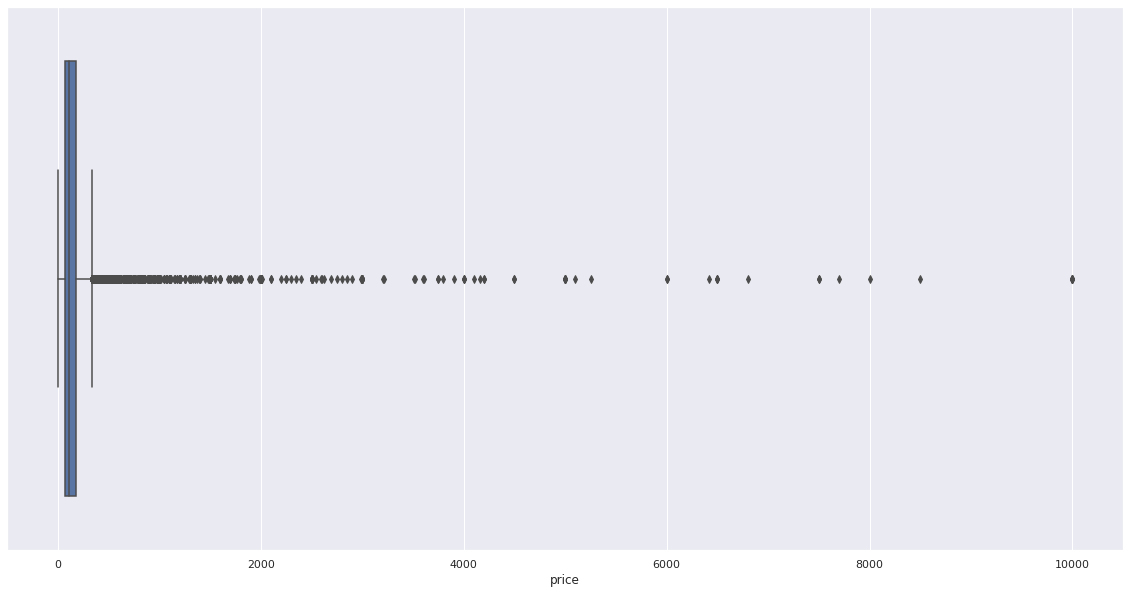

In [ ]:
# Chart - 12 visualization code
sns.boxplot(df['price'])

In [ ]:
df.describe() # going to use the quantile approach to deal with outliers

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


In [ ]:
min_threshold,max_threshold= df.price.quantile([0.01,0.999])
min_threshold,max_threshold

(30.0, 3000.0)

In [ ]:
# looking for prices below minimum threshold (min_threshold)
df[df['price'] < min_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0,6,338


In [ ]:
# getting max_threshold 
df[df['price'] > max_threshold]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,4,0,0,1,83
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,1,2,0,1,365
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,0,1,359
3695,2224896,NYC SuperBowl Wk 5 Bdrs River View,11353904,Todd,Manhattan,Upper West Side,40.79476,-73.97299,Entire home/apt,4000,1,0,0,1,0
3720,2243699,"SuperBowl Penthouse Loft 3,000 sqft",1483320,Omri,Manhattan,Little Italy,40.71895,-73.99793,Entire home/apt,5250,1,0,0,1,0
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,0,1,0
3788,2281142,Prime NYC Location for Super Bowl,1427243,Jordana,Manhattan,East Village,40.73323,-73.98859,Entire home/apt,3750,1,0,0,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,0,1,363
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,0,11,365
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0,11,365


In [ ]:
df_minmax = df[(df.price > min_threshold) & (df.price < max_threshold)]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


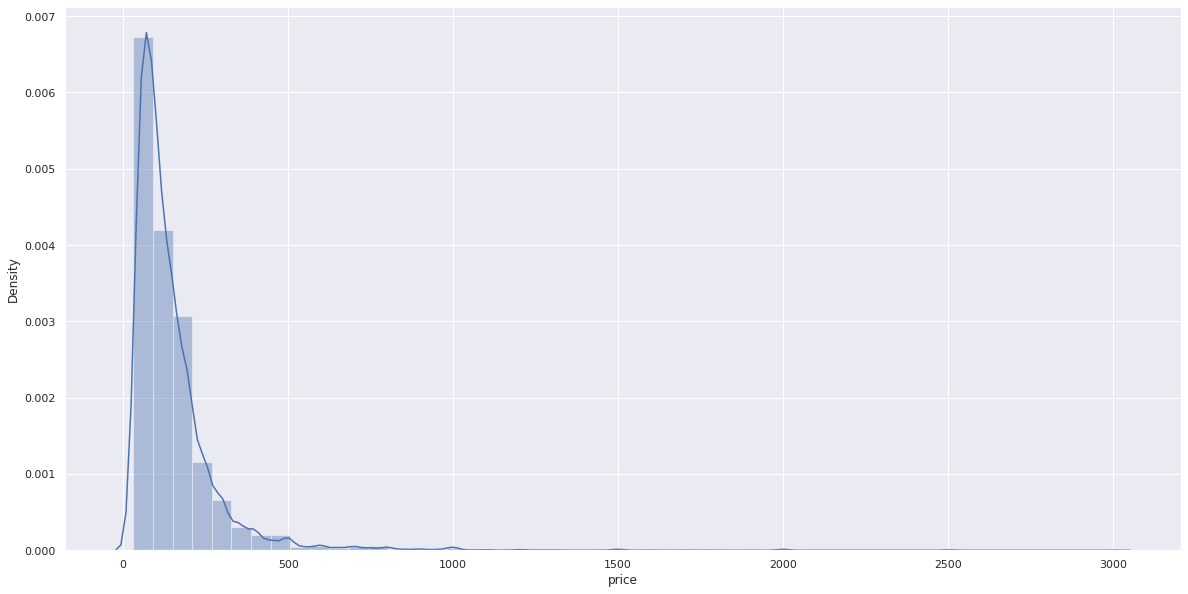

In [ ]:
sns.distplot(df_minmax['price'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


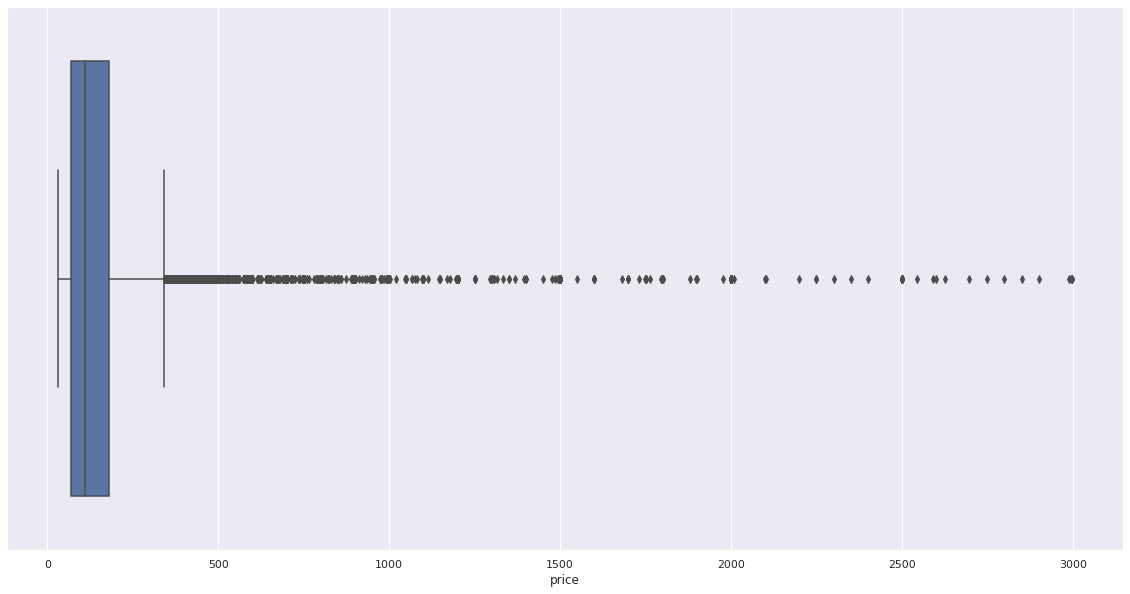

In [ ]:
sns.boxplot(df_minmax['price'])

##### 2. What is/are the insight(s) found from the chart?

There are still so many outliers. Let's see the skewness and kurtosis. 

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_minmax['price'].skew())
print("Kurtosis: %f" % df_minmax['price'].kurt())

Skewness: 6.378314
Kurtosis: 70.394436


#### Chart - 13 : Boxplot (working with outliers)

In [ ]:
# removing outliers using interquartile range approach (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                                1.968023e+07
host_id                           9.961239e+07
latitude                          7.301500e-02
longitude                         4.679500e-02
price                             1.060000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.300000e+01
reviews_per_month                 1.000000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.270000e+02
dtype: float64


In [ ]:
# function to remove outliers
def outliers(column):
  sorted(column)
  Q1, Q3 = np.percentile(column, [25, 75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

In [ ]:
lower_bound, upper_bound = outliers(df['price'])

In [ ]:
df[(df.price < lower_bound) | (df.price > upper_bound)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0,1,23
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,0,1,9


In [ ]:
# subsetting rows that have datapoints greater than lower range and lesser than upper range
df_minmax = df[(df.price > lower_bound) & (df.price < upper_bound)]
df_minmax

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0,6,2


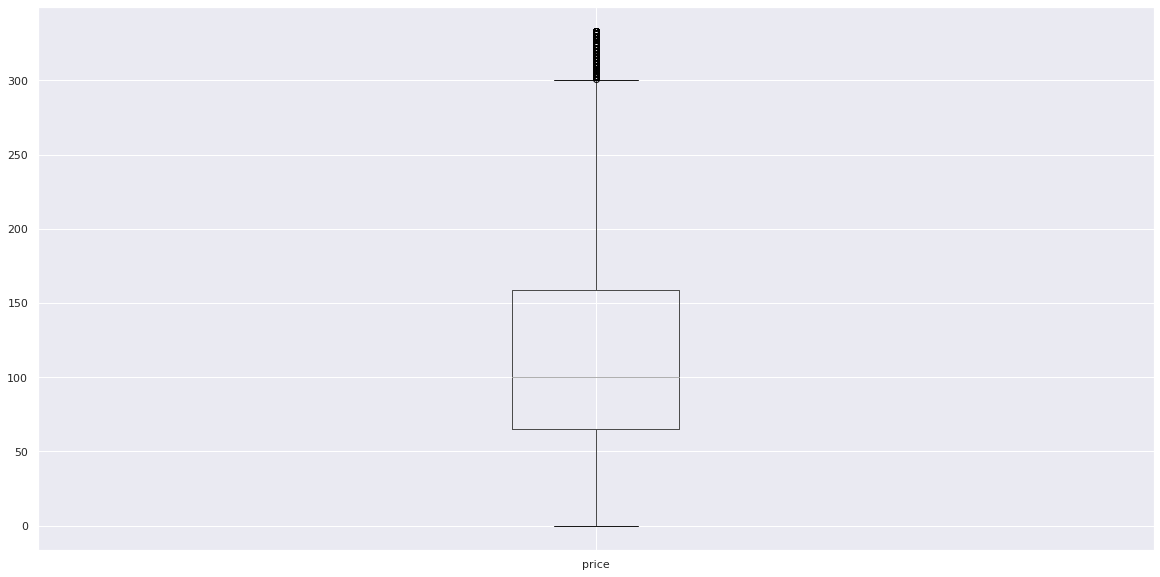

In [ ]:
# Chart - 13 visualization code
df_minmax.boxplot(column = 'price')

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_minmax['price'].skew())
print("Kurtosis: %f" % df_minmax['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


##### 2. What is/are the insight(s) found from the chart?

This chart helps detect the outliers and work conveniently with outliers and now our boxplot looks okay with outliers pushed above 300. The median lies near 100.  

#### Chart - 15 : Distplot (new price without outliers)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


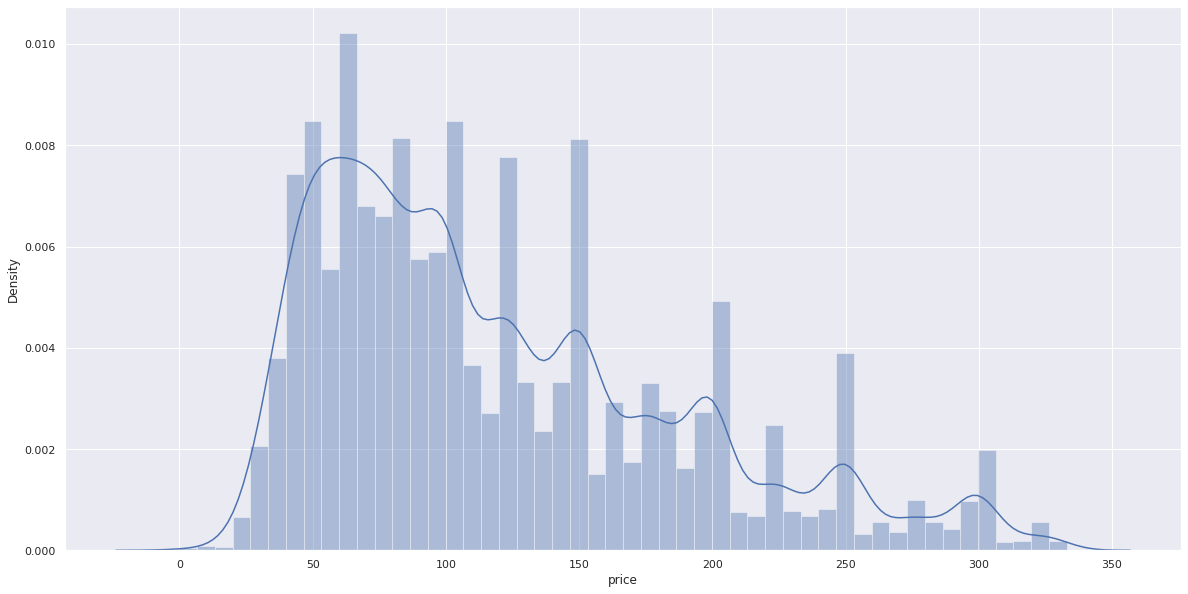

In [ ]:
# Chart - 15 visualization code
# Checking for distribution of the new price without outliers
sns.distplot(df_minmax['price'])

#### Chart - 16 : Violinplot

**Bi-variate Analysis**

Now, understanding the price distribution across neighbourhood groups

In [ ]:
df_minmax['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

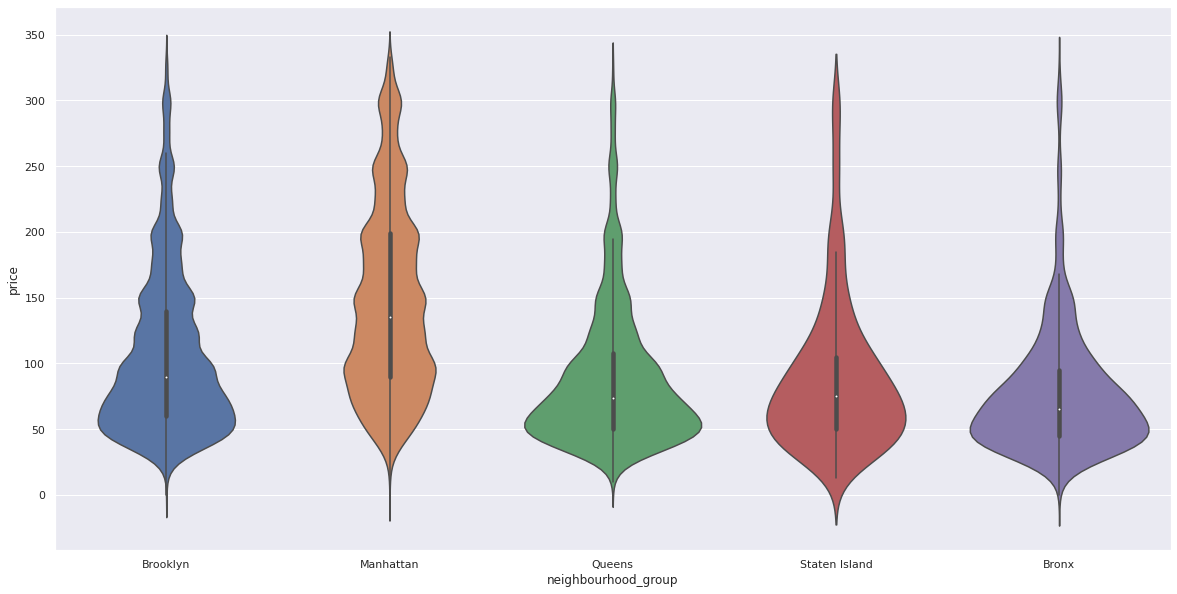

In [ ]:
# Chart - 16 visualization code
sns.violinplot(x='neighbourhood_group', y='price', data = df_minmax)

We used violin plot so we can simply represent the data together instead of doing a distribution plot for each neighbourhood_group to get overall statistics for each group. We get the median of price/neighbourhood_groups.

We can use seaborn point plot to know the mean/average of the same.

Here, Manhattan being the costliest place to live and having prices more than 140USD followed by brooklyn having 80USD on average for the property listings. Queens and Staten Islands have the same average. 

#### Chart - 17 : Pointplot

In [ ]:
from statistics import mean

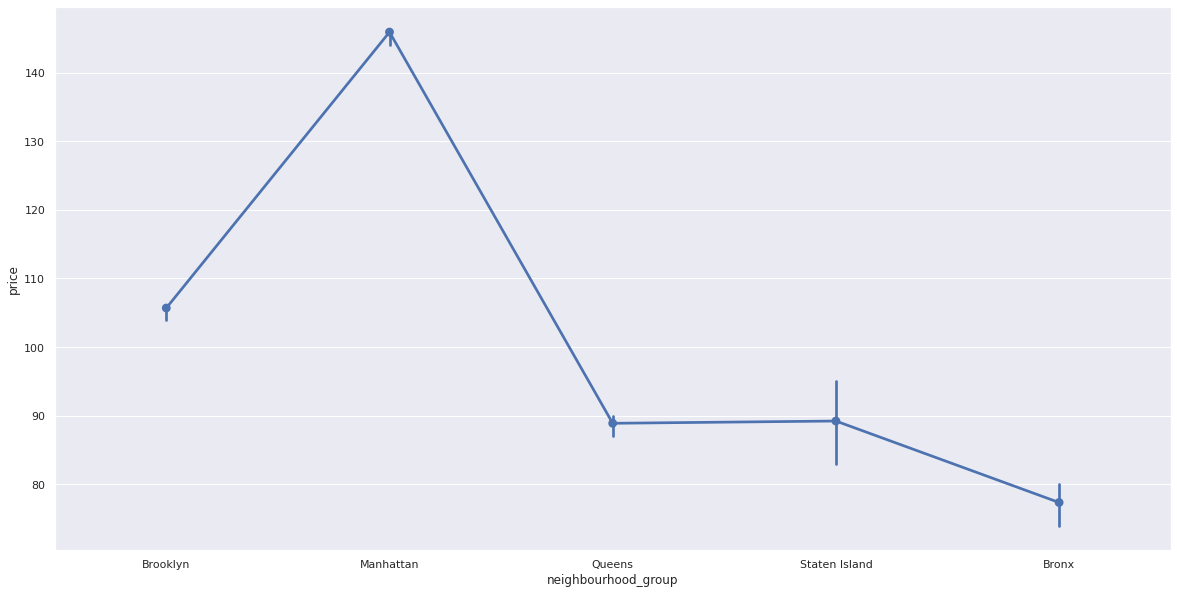

In [ ]:
#looking for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=df_minmax, estimator=mean)

We can see that Manhattan has the highest(the costliest) average of price ranging to ~150dollars/day followed by Brooklyn

Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

Well, let's deep dive into cost of living as it is the most important factor for someone willing to rent/stay using Airbnb.

#### Chart - 18 : Bar (highest average/day in each neighbourhood groups)

**Now, Let's check the most expensive and cheapest listings according to prices**

In [ ]:
# Most expensive
df_minmax.nlargest(5,'price')[['name', 'neighbourhood_group', 'neighbourhood', 'host_name', 'room_type']]

,name,neighbourhood_group,neighbourhood,host_name,room_type
13798,Mid-Century Museum Sleepover,Brooklyn,Williamsburg,Cullen,Entire home/apt
15150,Midtown Sleep 6 Central Convenience,Manhattan,Midtown,Adam,Entire home/apt
19641,"SOMMwhere in NYC/ a unique, conscious artists ...",Manhattan,Lower East Side,Fatima,Private room
25161,Flatiron Loft 3BR/1.5 Bath Best Location\n30 days,Manhattan,Midtown,Mel,Entire home/apt
28062,27 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,Manhattan,Upper West Side,Rated,Entire home/apt


It seems all the most expensive places are in Manhattan itself being the costliest place to live. Next, we check the cheapest places.

In [ ]:
# cheapest
df_minmax.sort_values(by='price', ascending=True)[['name', 'neighbourhood_group', 'neighbourhood', 'host_name', 'room_type']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type
26841,Coliving in Brooklyn! Modern design / Shared room,Brooklyn,Bushwick,Sergii,Shared room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Brooklyn,Bushwick,Martial Loft,Private room
25753,"Sunny, Quiet Room in Greenpoint",Brooklyn,Greenpoint,Lauren,Private room
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Aymeric,Entire home/apt


Most of these cheaper listings are private rooms and shared rooms in Brooklyn and Bronx.

**Now we check the most expensive rooms/day in the neighbourhood.**

In [ ]:
# the highest average/day in each neighbourhood groups
df_NG = df_minmax.groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().reset_index()

In [ ]:
top_NG = df_NG.loc[df_NG.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price', ascending=False)

In [ ]:
top_NG

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,212.495327
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Among all the top neighbour_groups, willowbrook and neponsit are the highest originating from Staten Islands and Queens.

Tribeca from Manhattan, Mill Basin from Brooklyn and West Farms from Bronx.

Text(0, 0.5, 'price')

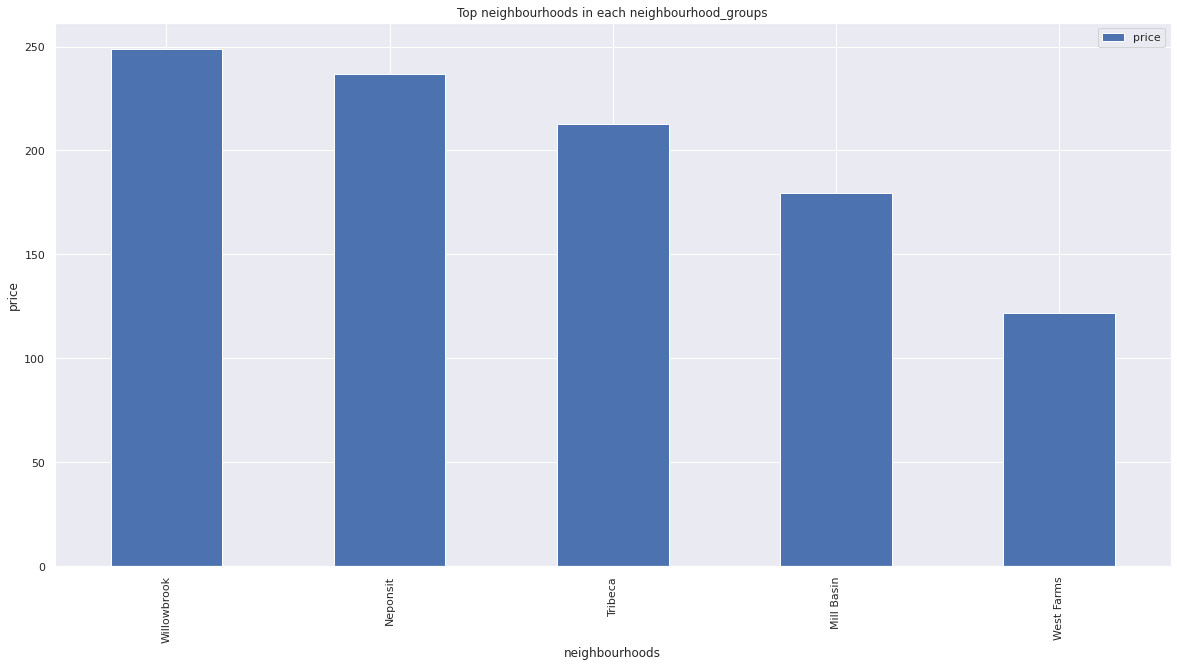

In [ ]:
top_NG.plot.bar(x = 'neighbourhood', rot = 90, title = 'Top neighbourhoods in each neighbourhood_groups')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

#### Chart - 19 : Bar (room type vs price)

**Costliest listings in each neighbourhood_groups and their hostnames**

In [ ]:
df_expensive = df_minmax.loc[df_minmax.groupby(['neighbourhood_group'])['price'].idxmax()][['name', 'neighbourhood_group', 'host_name', 'price']]
df_expensive.sort_values(by='price', ascending=False)

,name,neighbourhood_group,host_name,price
13798,Mid-Century Museum Sleepover,Brooklyn,Cullen,333
15150,Midtown Sleep 6 Central Convenience,Manhattan,Adam,333
10710,"Waterfront, perfect NYC getaway!",Bronx,Frank And Anna,325
3389,Art Boutique 2BR Suite at JFK Airport,Queens,Jay,325
11373,Staten Island NYC Marathon,Staten Island,Elizabeth,300


Looks like the top 2 have the same price, Mid-Century Meuseum sleepover in Brooklyn and Midtown sleep 6 central convenience hosted by Cullen and Adam respectively.

In [ ]:
#room type vs price
df_minmax['room_type'].unique() # will show the different types of rooms available

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

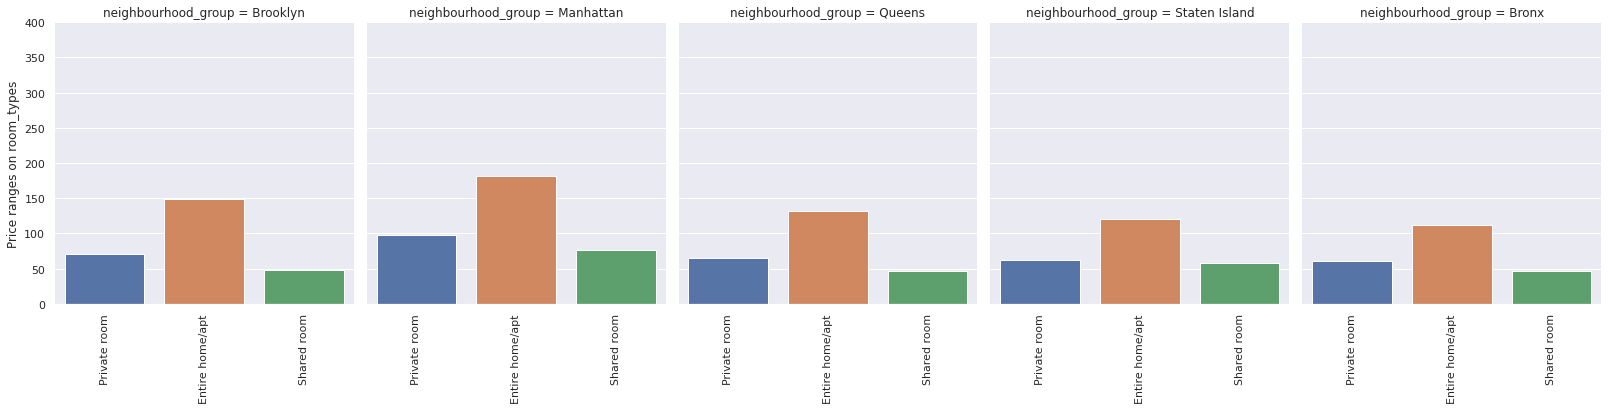

In [ ]:
d = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=df_minmax, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(d.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True)) 

Manhattan as usual being above the rest with upto 240USD/night, followed by private rooms at 110USD/night. According to the graphs, Entire home/apt looks like the most popular choice for users to rent. 

#### Chart - 20 : Bar (room types vs average nights stayed in each room type)

**Now let's find out how many nights people stayed in each room type**

Text(0.5, 1.0, 'minimum nights stayed at each room type')

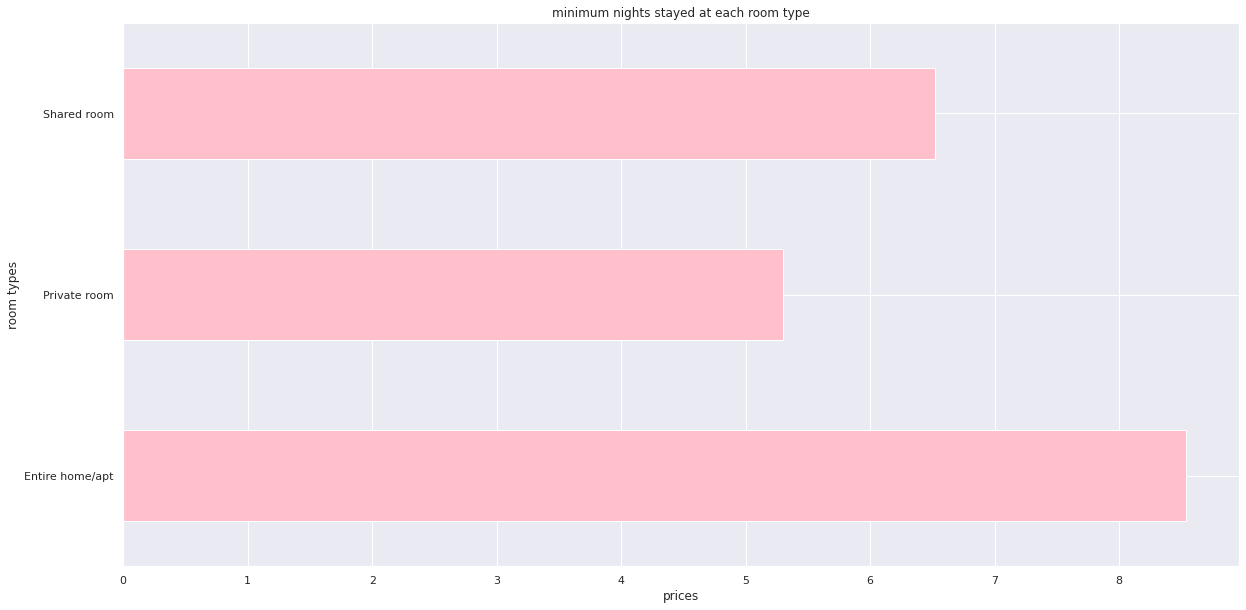

In [ ]:
df_minmax.groupby(by='room_type')['minimum_nights'].mean().plot(kind='barh', color = 'pink')
plt.xlabel('prices')
plt.ylabel('room types')
plt.title('minimum nights stayed at each room type')

This graph shows that users prefer entire home/apt the most which is followed by shared rooms. On average, users stayed at entire home/apt for 8-9 days and 6-7 days at shared rooms. 

#### Chart - 21 : Stripplot

**Now checking and working with reviews.**

In [ ]:
top10_reviews = df.nlargest(10, 'reviews_per_month')
top10_reviews[['name', 'reviews_per_month', 'neighbourhood_group']]

,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58,Manhattan
42076,Great Room in the heart of Times Square!,27,Manhattan
38870,Lou's Palace-So much for so little,20,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16,Queens
36238,“For Heaven Cakes”,15,Queens
40036,6 Minutes From JFK Airport Cozy Bedroom,15,Queens


Here, we can see that the top 2 names are from Manhattan. Enjoy great views of the City in our Deluxe Room!	having 58 reviews followed by Great Room in the heart of Times Square! with 27 reviews. It indicates that it is most preferred and best place to live in but prices are too high to afford. The following are from Queens. 

Now let's check monthly reviews for each room type in each neighbourhood group.

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

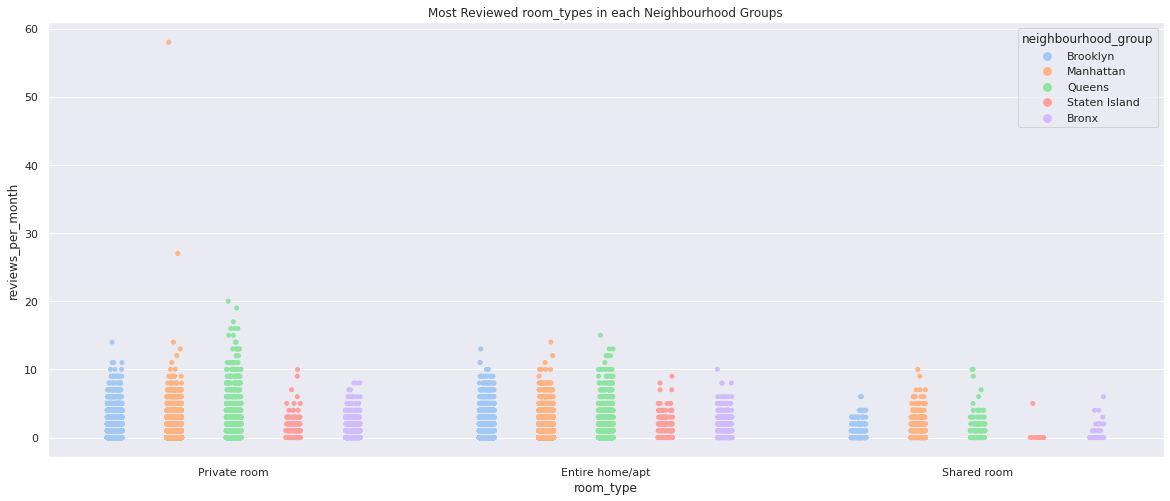

In [ ]:
f,ax = plt.subplots(figsize=(20,8))
ax= sns.stripplot(x='room_type', y='reviews_per_month', hue='neighbourhood_group', dodge=True, data=df ,palette='pastel')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

Manhattan having the most number of reviews per month being above 50 which are private rooms followed by Queens. It seems that private rooms have a higher review rate. 

Manhattan & Queens got the most no of reviews for Entire home/apt room type.

There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.

**Let's find the top 10 reviewed hosts on the basis of reviews/month.**

Text(0.5, 1.0, 'Top 10 reviews per month recieved by hosts')

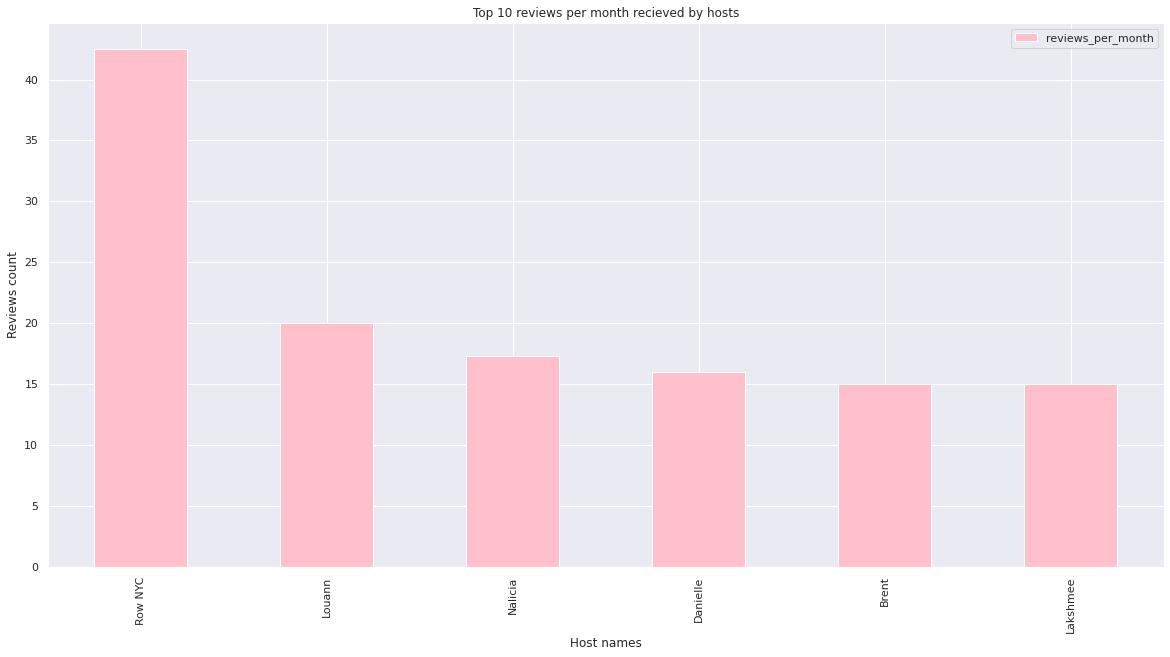

In [ ]:
#there are cases where same hosts are hosting multiple properties in same/different areas
df_reviews = top10_reviews.groupby('host_name')['reviews_per_month'].mean()
df_reviews = df_reviews.reset_index().sort_values(by = 'reviews_per_month', ascending=False)
df_reviews.plot(kind = 'bar', x = 'host_name', y = 'reviews_per_month', color = 'pink')
plt.ylabel('Reviews count')
plt.xlabel('Host names')
plt.title('Top 10 reviews per month recieved by hosts')

Row NYC has the most reviews per month having more than 40 reviews on average.

#### Chart - 22 : Boxplot (room availability vs neighbourhood groups)

**Hosts with most number of listings according to number of host listings**

In [ ]:
df_host_with_most_listings = df.groupby(['host_name', 'neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
df_largest_listing = df_host_with_most_listings.nlargest(10, 'calculated_host_listings_count')
df_largest_listing

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,106929
1838,Blueground,Manhattan,53360
7279,Kara,Manhattan,14669
6544,Jeremy & Laura,Manhattan,9216
13220,Sonder,Manhattan,9216
2905,Corporate Housing,Manhattan,8281
7484,Kazuya,Queens,8137
7550,Ken,Manhattan,7500
11403,Pranjal,Manhattan,4225
9860,Mike,Manhattan,2824


Sonder(NYC) has the most number of calculated_host_listings_count followed by Blueground, both being in Manhattan. 

We can also check for hosts with most number of listings in each neighbourhood groups.

The hosts leading with most number of listings in NYC.

In [ ]:
df_hosts = df_host_with_most_listings.groupby(['neighbourhood_group'])['calculated_host_listings_count'].transform(max) == df_host_with_most_listings['calculated_host_listings_count']
df_host_with_most_listings[df_hosts].sort_values(by = 'calculated_host_listings_count', ascending=False)

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,106929
7484,Kazuya,Queens,8137
14436,Vida,Brooklyn,2705
14439,Vie,Bronx,169
689,Amarjit S,Staten Island,64


So, Sonder (NYC), Kazuya, Vida, Vie and Amarjit are the hosts with most no of listings in each neighbourhood groups in entire NYC.

Below is the room type and their relation with availability in different neighbourhood groups.

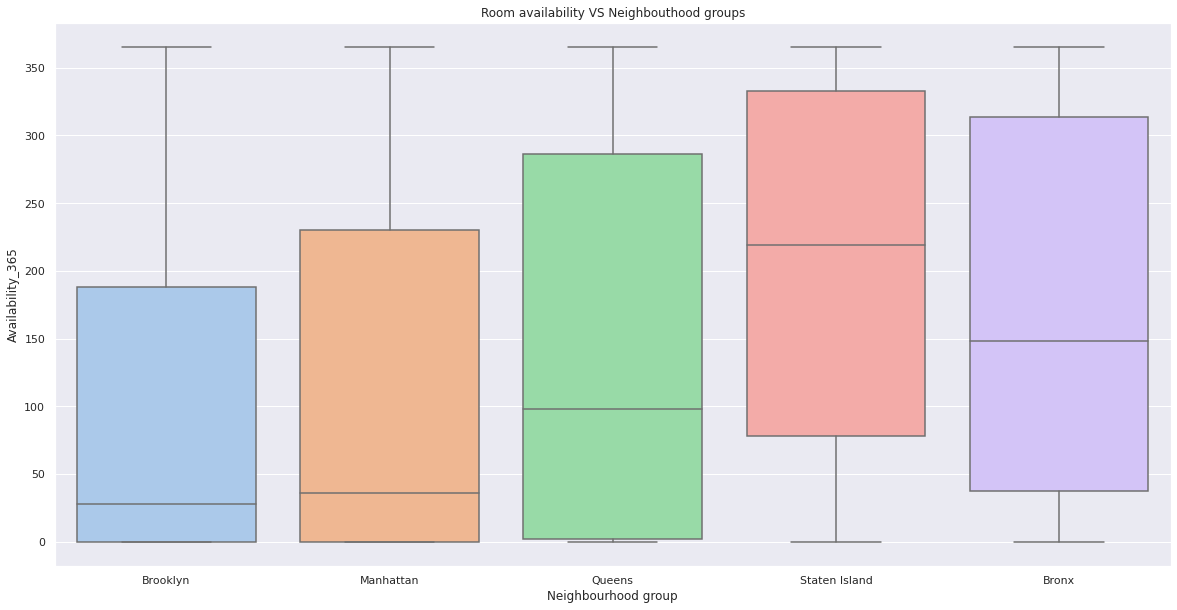

In [ ]:
f, ax = plt.subplots(figsize = (20,10))
ax = sns.boxplot(x = 'neighbourhood_group', y = 'availability_365', data = df, palette = 'pastel')
plt.title('Room availability VS Neighbouthood groups')
plt.xlabel('Neighbourhood group')
plt.ylabel('Availability_365')
plt.show()

Looking at the boxplot on Staten Island, it infers that the rooms are available more here and for more than 300 days. On an average, these listings are available around 210 days every year followed by Bronx where the rooms are available for 150 days a year. 

#### Chart - 23 : Scatterplot (Locations)

**Latitude and Longitudes**

Text(0.5, 1.0, 'Location co-ordinates')

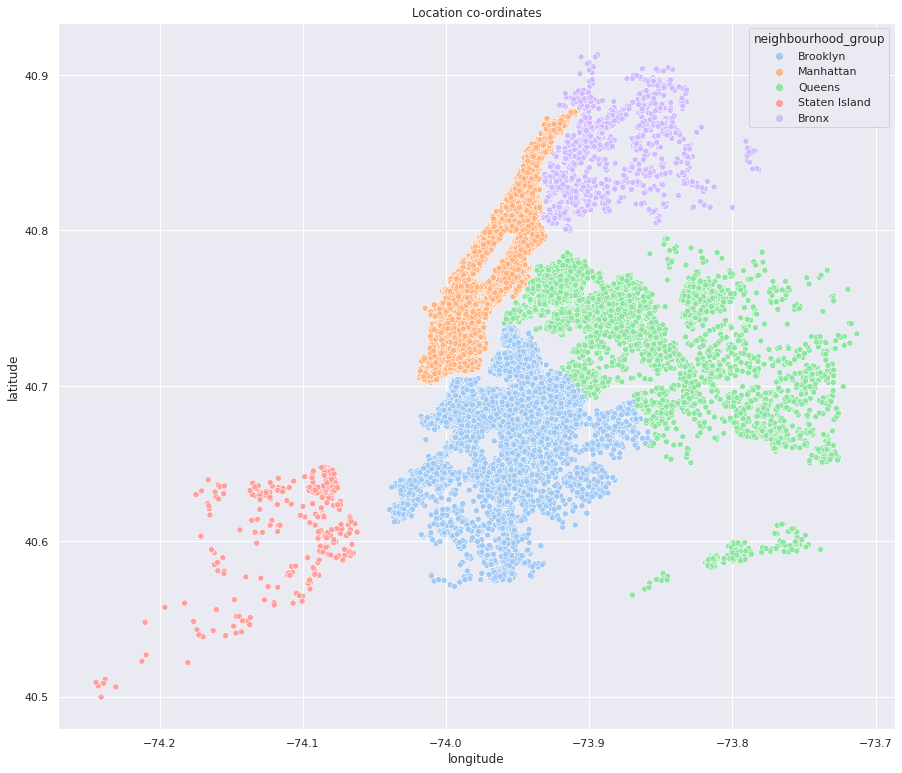

In [ ]:
# checking where they belong on the map using longitude and latitudes
sns.set(rc={'figure.figsize':(15,13)})
ax = sns.scatterplot(data = df_minmax, x = 'longitude', y = 'latitude', hue = 'neighbourhood_group', palette = 'pastel')
ax.set_title('Location co-ordinates')

Let's see the room types as well.

Text(0.5, 1.0, 'Room types distribution across locations')

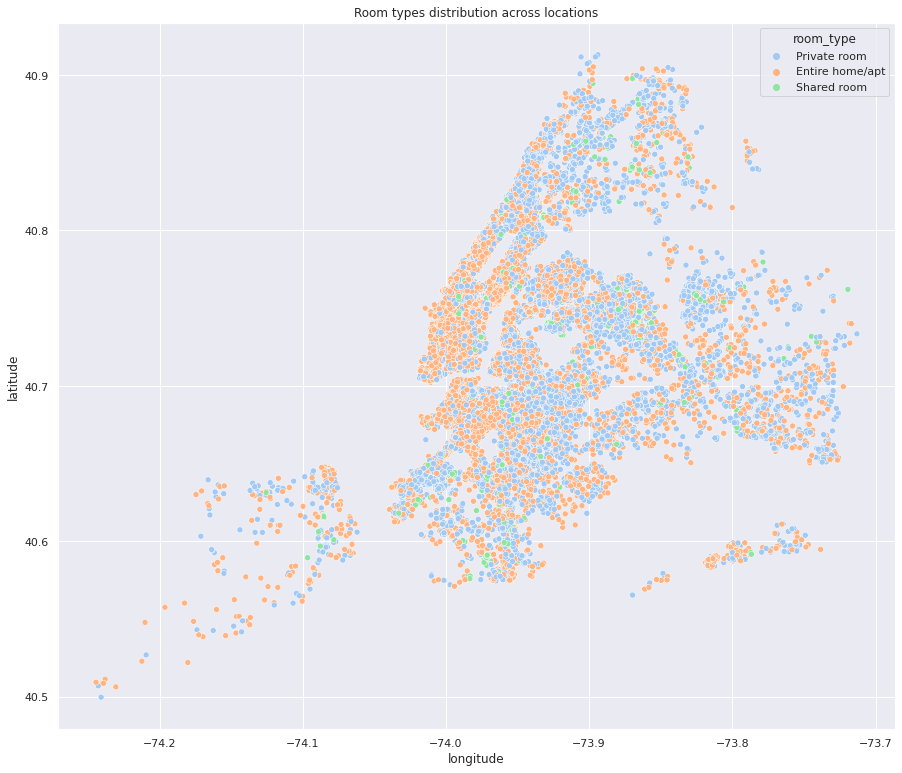

In [ ]:
sns.set(rc={'figure.figsize': (15,13)})
ax = sns.scatterplot(x = df_minmax.longitude, y = df_minmax.latitude, hue = df_minmax.room_type, palette = 'pastel')
ax.set_title('Room types distribution across locations')

With the two scatterplots, we can infer that shared rooms are extremely less compared to entire home/apt and private rooms. 95% users prefer entire home/apt and private rooms as we analysed earlier, given how most of the listings in NYC are entire home/apt and private rooms. 

Now let's work on the price variations across these locations. 

#### Chart - 24 : Scatterplot (prices across the locations)

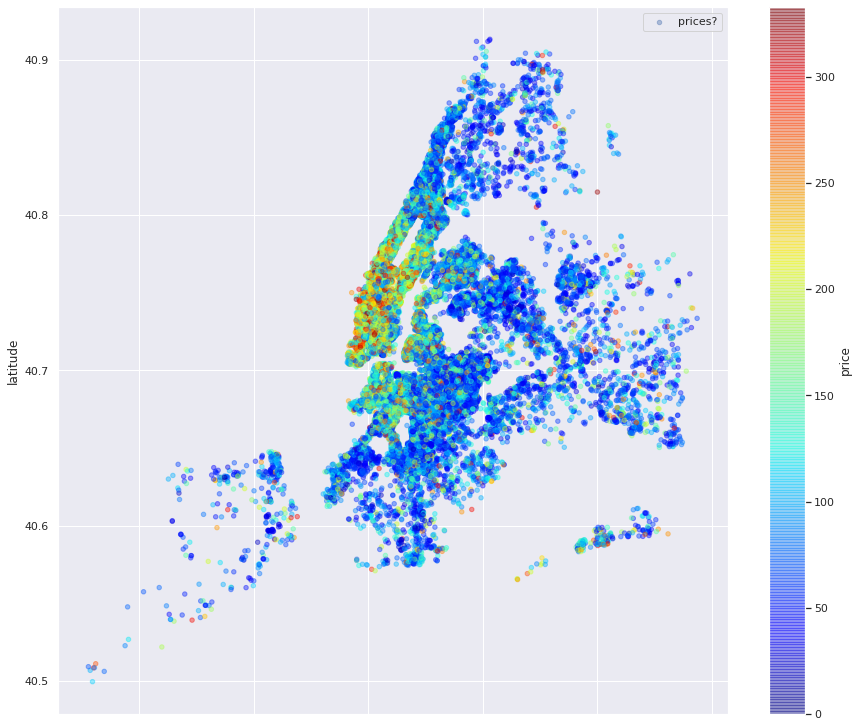

In [ ]:
# Price variations across the locations we plotted above.
lat_long = df_minmax.plot(kind = 'scatter', x = 'longitude', y = 'latitude', label = 'prices?', c = 'price', cmap = plt.get_cmap('jet'), colorbar = True, alpha = 0.4, figsize = (15,13))
lat_long.legend()

Looking at it, Manhattan is the cosliest. Most of the prices are ranged low across the plot. 

#### Chart - 25 : Scatterplot (Listings's availability in a year)

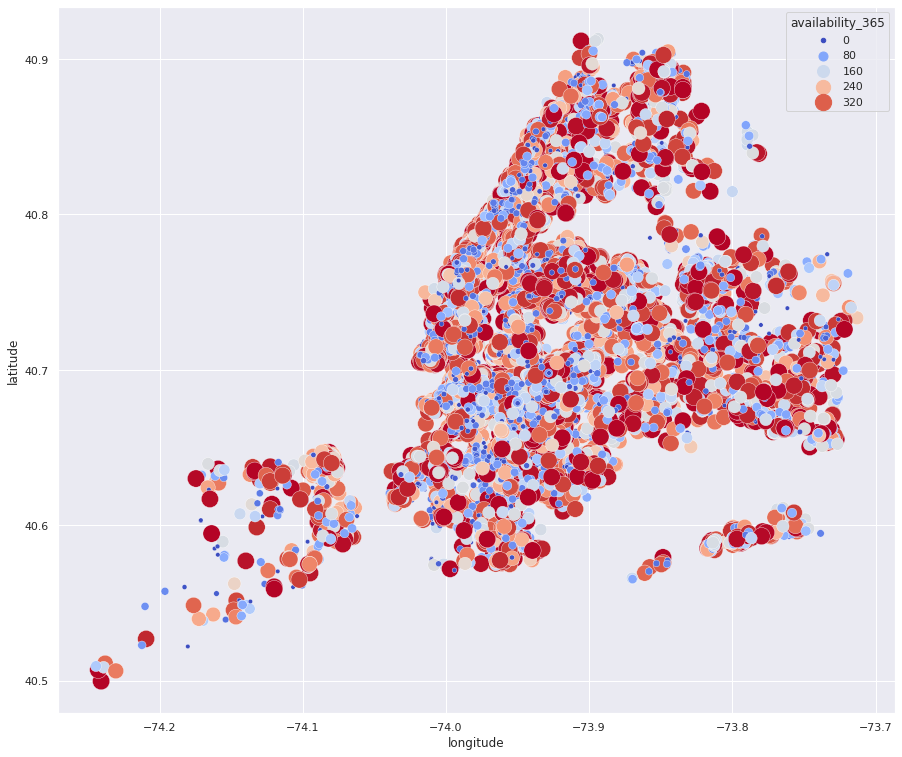

In [ ]:
f , ax = plt.subplots(figsize = (15, 13))
ax = sns.scatterplot(data = df_minmax, x = 'longitude', y = 'latitude', hue = 'availability_365', palette = 'coolwarm', size = 'availability_365', sizes = (20,300))

Bronx and Staten Islands has listings which are mostly available throughout the year but they are not as expensive as Brooklyn, Queens and Manhattan. 

Hence, Analysis concluded but there might be more we can do. 

So here we worked with variables, prices and also checked the most correlated variables, outliers, null values and made it easier using data visualisations to analyse the data.

# **Conclusion**

After the above operations, we can conclude that:
1.   Manhattan is the most expensive place in NYC
2.   Most users don't prefer shared rooms. There are considerably more entire home/apt and private rooms as compared to shared. 
3.   The location of the property also has an affect on the property listing's price.
4.   Most of the cheaper options like in Staten Islands and Bronx are available throughout the year. 
5.   With more variables like tax_rate, amentities and so on, we can make a deeper dive in the how users decide to rent and the trend of availability, available nights and prices. 
6.   Having more options in the dataset like schools, hospitals, grocery marts, convenience stores, etc near the property would've helped decide the trend of prices in a more detailed way since they might have high relation with the prices listed.  
7.   We could've also used time series to find which seasons, time of the year the properties would be the busiest.
8.   We even used data charts for a better understanding and a rough idea of how the data might work with other variables.
9.   Here, we conclude our analysis. 

 — Meghna Phanse, 2023. 



